In [30]:
import requests
import json
import time

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
time.sleep(0.1)

In [33]:
class CardImageFetcher:
    
    def __init__(self, json_path):
        self.cards = json.load(open(json_path))
        self.image_url_lookup = self._make_image_url_lookup()
    
    def fetch(self, name):
        card_id = self.image_url_lookup
    
    def _make_image_url_lookup(self):
        lookup = {}
        for card in self.cards:
            card_id = card['scryfallId']
            api_url = f"https://api.scryfall.com/cards/{card_id}"
            card_data = requests.get(api_url).json()
            card_image_uri = card_data["image_uris"]['small']
            lookup[card['name']] = card_image_uri
            time.sleep(0.05)
        return lookup

In [34]:
cif = CardImageFetcher('data/m20/m20-cards.json')

In [68]:
json.dump(cif.image_url_lookup, open('data/m20/m20-cards-image-urls.json', 'w'))

In [75]:
!cat data/m20/m20-cards-image-urls.json | jq

{
  "Act of Treason": "https://img.scryfall.com/cards/small/front/2/0/20234668-53ce-4cc8-892f-30ee3ecfc34c.jpg?1563899077",
  "Aerial Assault": "https://img.scryfall.com/cards/small/front/6/4/64d9c182-cbb3-4791-90dd-0e533ddeebda.jpg?1563898171",
  "Aether Gust": "https://img.scryfall.com/cards/small/front/7/8/783da808-6698-4e55-9fac-430a6effe2b1.jpg?1563898481",
  "Agent of Treachery": "https://img.scryfall.com/cards/small/front/c/c/cc6686e6-4535-49be-b0b3-e76464656cd2.jpg?1563898488",
  "Aggressive Mammoth": "https://img.scryfall.com/cards/small/front/4/e/4e68b3bd-996e-4383-b134-f529bcb768de.jpg?1563900453",
  "Agonizing Syphon": "https://img.scryfall.com/cards/small/front/0/d/0d8efd95-1c2f-4dd1-b70b-3cfb10ff3a28.jpg?1563898795",
  "Air Elemental": "https://img.scryfall.com/cards/small/front/a/2/a27efec0-40c4-48bc-a21a-3af28a6529b5.jpg?1563898494",
  "Ajani, Inspiring Leader": "https://img.scryfall.com/cards/small/front/d/b/dba41e5f-66b8-4459-8a07-bbe893216f1e.jpg?1563900139",
  "Ajan

In [79]:
class CardLayout:
    
    def __init__(self, card_image_url_path):
        self.card_image_urls = json.load(open(card_image_url_path, 'r'))
    
    def layout(self, card_names, nrow, ncol):
        urls = [self.card_image_urls[name] for name in card_names]
        images = [Image.open(requests.get(url, stream=True).raw) for url in urls]
        x, y = images[0].size
        together = Image.new('RGB', (x * ncol,y * nrow))
        for i in range(len(images)):
            px, py = x * int(i/nrow), y * (i%nrow)
            together.paste(images[i], (px, py))
        return together

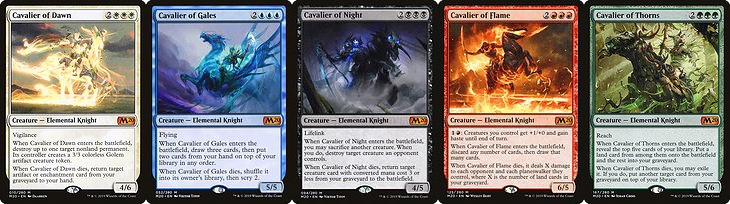

In [81]:
cl = CardLayout('data/m20/m20-cards-image-urls.json')
cl.layout(["Cavalier of Dawn", "Cavalier of Gales", "Cavalier of Night", "Cavalier of Flame", "Cavalier of Thorns" ], 1, 5)

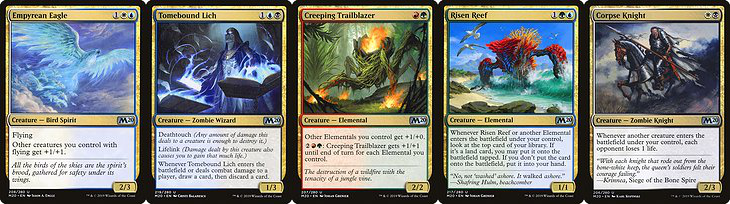

In [83]:
cl.layout(["Empyrean Eagle", "Tomebound Lich", "Creeping Trailblazer", "Risen Reef", "Corpse Knight"], 1, 5)

In [88]:
deck = ['Cavalier of Thorns',
 'Barkhide Troll',
 'Rabid Bite',
 'Ironroot Warlord',
 'Netcaster Spider',
 'Fencing Ace',
 'Inspiring Captain',
 'Raise the Alarm',
 'Inspiring Captain',
 'Rabid Bite',
 'Rabid Bite',
 'Leafkin Druid',
 'Rabid Bite',
 'Netcaster Spider',
 'Pacifism',
 'Raise the Alarm',
 'Griffin Protector',
 'Griffin Protector',
 'Fencing Ace',
 'Ancestral Blade',
 'Ironroot Warlord',
 'Pacifism',
 'Netcaster Spider',
 'Inspiring Captain']

In [87]:
len(deck)

26

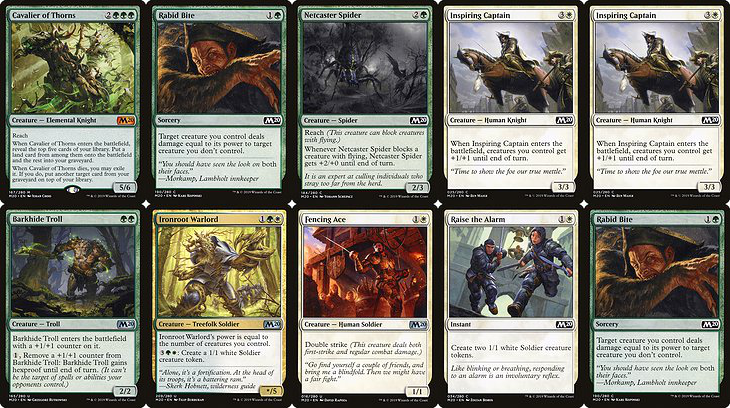

In [90]:
cl.layout(deck[:10], 2, 5)

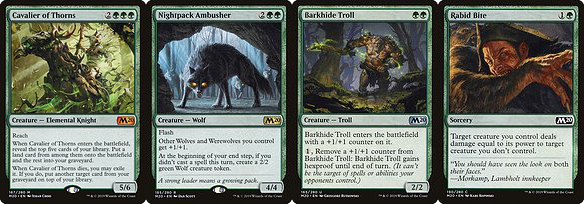

In [92]:
cl.layout(['Cavalier of Thorns', 'Nightpack Ambusher' ,'Barkhide Troll', 'Rabid Bite'], 1, 4)

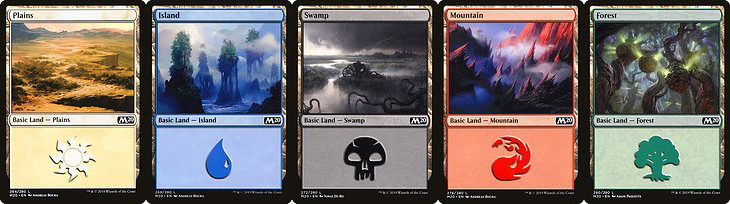

In [99]:
cl.layout(['Plains', 'Island', 'Swamp', 'Mountain', 'Forest'], 1, 5)

In [98]:
cl.card_image_urls.keys()

dict_keys(['Act of Treason', 'Aerial Assault', 'Aether Gust', 'Agent of Treachery', 'Aggressive Mammoth', 'Agonizing Syphon', 'Air Elemental', 'Ajani, Inspiring Leader', 'Ajani, Strength of the Pride', 'Ancestral Blade', 'Angel of Vitality', 'Angelic Gift', 'Angelic Guardian', 'Anticipate', 'Anvilwrought Raptor', 'Apostle of Purifying Light', 'Atemsis, All-Seeing', 'Audacious Thief', 'Bag of Holding', 'Barkhide Troll', 'Barony Vampire', 'Bartizan Bats', 'Bastion Enforcer', 'Battalion Foot Soldier', 'Befuddle', 'Bishop of Wings', 'Bladebrand', 'Blightbeetle', 'Blood Burglar', 'Blood for Bones', 'Bloodfell Caves', 'Bloodsoaked Altar', 'Bloodthirsty Aerialist', 'Blossoming Sands', 'Bogstomper', 'Bone Splinters', 'Bone to Ash', 'Boneclad Necromancer', 'Boreal Elemental', 'Brightwood Tracker', 'Brineborn Cutthroat', 'Bristling Boar', 'Brought Back', 'Canopy Spider', 'Captivating Gyre', 'Cavalier of Dawn', 'Cavalier of Flame', 'Cavalier of Gales', 'Cavalier of Night', 'Cavalier of Thorns', '